In [2]:
!pip install pandas
!pip install seaborn

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [88]:
df = pd.read_csv('/content/drive/MyDrive/Project - Portofolio/Porto/Cyclistic Bike Share/cleaned_2024Q3_divvy_tripdata.csv')
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,hour_of_day
0,1DAF1D21DD189392,classic_bike,2024-07-11 13:10:24.438,2024-07-11 13:40:40.770,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual,0 days 00:30:16.332000,Thursday,13
1,FE585F4776E80EA0,electric_bike,2024-07-31 18:34:23.169,2024-07-31 18:34:54.736,Public Rack - Nashotah & Northwest Hwy,1195.0,Public Rack - Nashotah & Northwest Hwy,1195.0,41.988141,-87.791447,41.988141,-87.791447,casual,0 days 00:00:31.567000,Wednesday,18
2,9E1FD617914BE881,electric_bike,2024-07-11 18:32:02.622,2024-07-11 18:34:45.675,Cottage Grove Ave & 51st St,TA1309000067,Cottage Grove Ave & 51st St,TA1309000067,41.802983,-87.606641,41.803038,-87.606615,casual,0 days 00:02:43.053000,Thursday,18
3,B43BBE1194D77051,electric_bike,2024-07-11 18:36:09.510,2024-07-11 18:37:10.591,Cottage Grove Ave & 51st St,TA1309000067,Cottage Grove Ave & 51st St,TA1309000067,41.802965,-87.606667,41.803038,-87.606615,casual,0 days 00:01:01.081000,Thursday,18
4,2AA528A0E116872F,electric_bike,2024-07-11 18:36:27.991,2024-07-11 18:39:50.280,Cottage Grove Ave & 51st St,TA1309000067,Cottage Grove Ave & 51st St,TA1309000067,41.803015,-87.606604,41.803038,-87.606615,casual,0 days 00:03:22.289000,Thursday,18


In [89]:
print(f"shape: {df.shape} \n")
print(f"dtypes: {df.dtypes} \n")
print(f"null values: {df.isnull().sum()} \n")
print(f"duplicates: {df.duplicated().sum()}")

shape: (1619339, 16) 

dtypes: ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
ride_length            object
day_of_week            object
hour_of_day             int64
dtype: object 

null values: ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
ride_length           0
day_of_week           0
hour_of_day           0
dtype: int64 

duplicates: 0


In [90]:
print("min start date", min(df['started_at']))
print("max start date", max(df['started_at']))

print("min end date", min(df['ended_at']))
print("max end date", max(df['ended_at']))

min start date 2024-06-30 09:48:17.508
max start date 2024-09-30 23:52:58.172
min end date 2024-07-01 00:00:15.032
max end date 2024-09-30 23:59:52.562


In [113]:
df['ride_length'] = pd.to_timedelta(df['ride_length'])
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

Total Trips: member_casual
member    942651
casual    676688
Name: count, dtype: int64



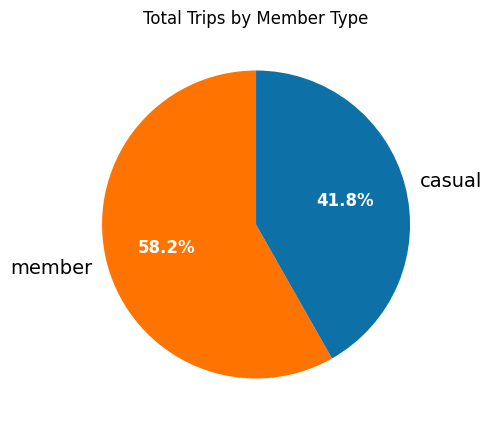

In [115]:
total_trips = df['member_casual'].value_counts()
print(f"Total Trips: {total_trips}\n")

plt.figure(figsize=(5, 5))
patches, texts, autotexts = plt.pie(total_trips, labels=total_trips.index, autopct='%1.1f%%', startangle=90, colors=['#ff7300','#0d70a6'])

# Adjust label distance and font size
plt.setp(autotexts, size=12, weight="bold", color='white')
plt.setp(texts, size=14)
plt.title("Total Trips by Member Type")
plt.show()

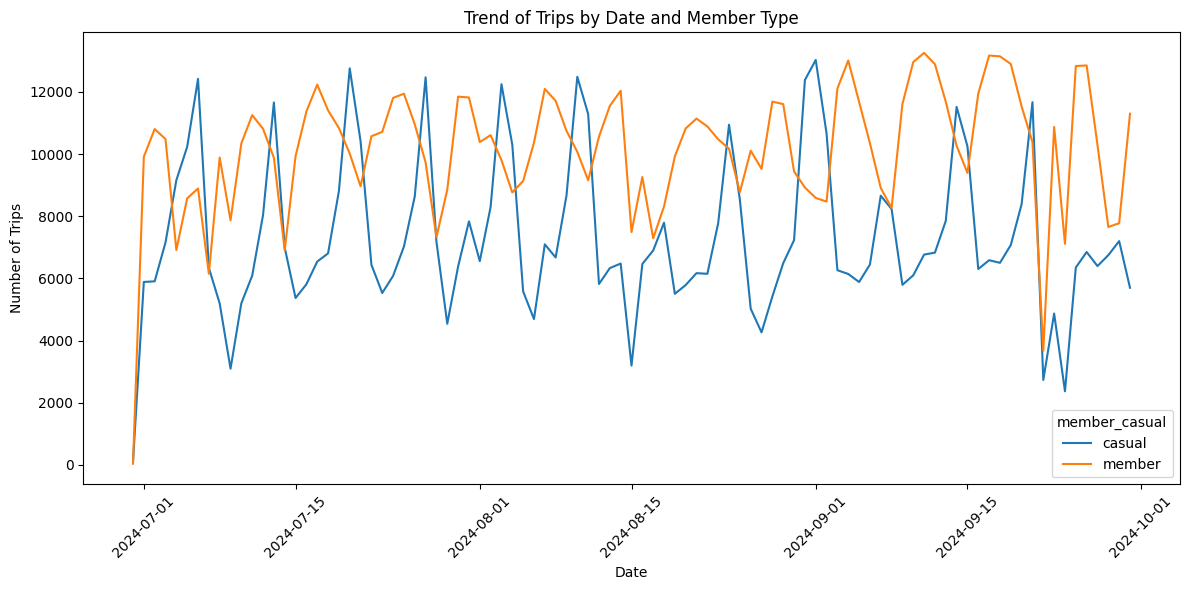

In [118]:
df['date'] = df['started_at'].dt.date

trips_by_date = df.groupby(['date', 'member_casual'])['ride_id'].count().reset_index(name="trip_count")

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='trip_count', hue='member_casual', data=trips_by_date, hue_order=['casual', 'member'])

plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.title('Trend of Trips by Date and Member Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

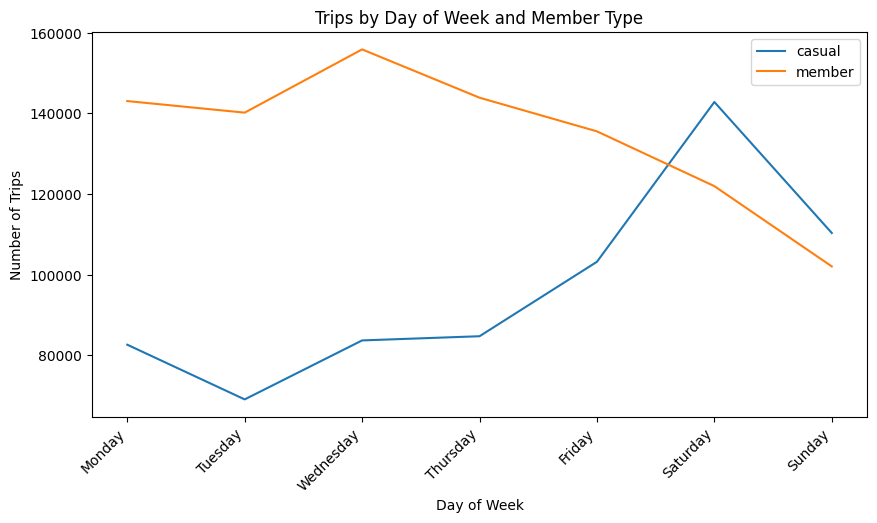

In [220]:
count_by_day = df.groupby(['day_of_week', 'member_casual'])['ride_id'].count().reset_index(name='count')
count_by_day['day_of_week'] = pd.Categorical(count_by_day['day_of_week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
count_by_day = count_by_day.sort_values(by=['member_casual','day_of_week'])
# print(count_by_day)

#plot the number of trips based on member type
plt.figure(figsize=(10,5))
sns.lineplot(data=count_by_day, x="day_of_week", y="count", hue="member_casual", hue_order=["casual", "member"])
plt.xlabel("Day of Week")
plt.ylabel("Number of Trips")
plt.title("Trips by Day of Week and Member Type")
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

In [126]:
df_weekday = df[(df['day_of_week'] != 'Sunday') & (df ['day_of_week'] != 'Saturday')]
df_weekend = df[(df['day_of_week'] == 'Sunday') | (df ['day_of_week'] == 'Saturday')]

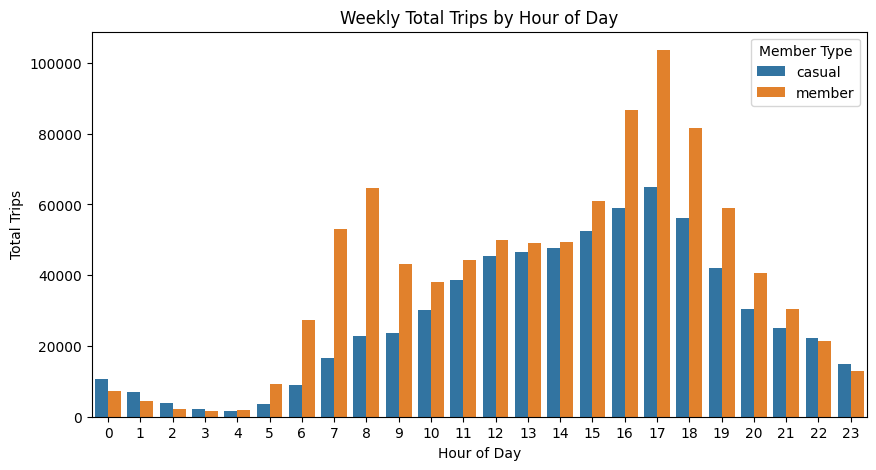

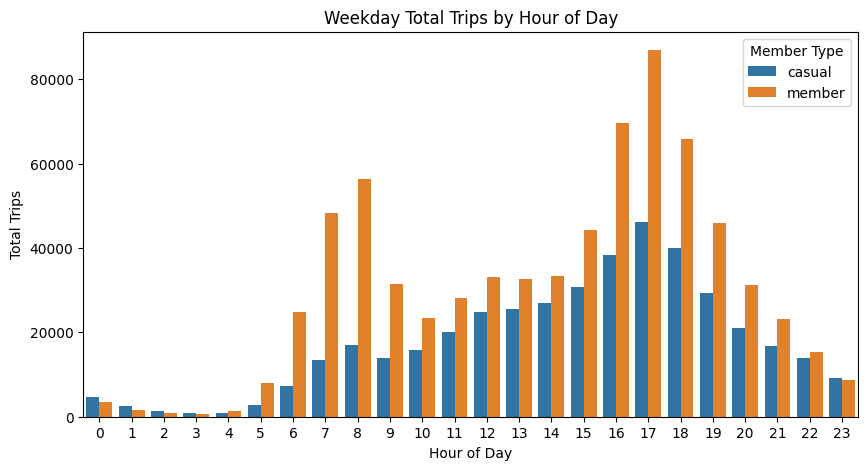

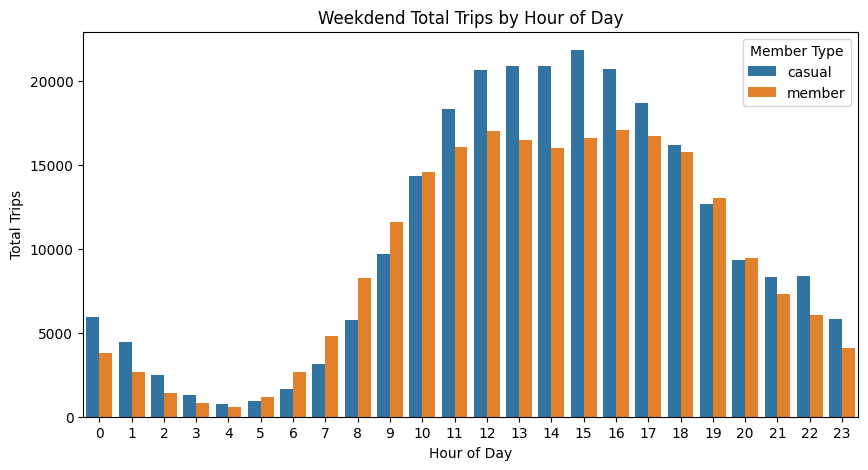

In [219]:
#overall
df_hour = df.groupby(["hour_of_day", "member_casual"])["ride_id"].count().reset_index(name="total_trips")
# print('weekly total trips by hour of day', df_hour)

plt.figure(figsize=(10, 5))
sns.barplot(x="hour_of_day", y="total_trips", hue="member_casual", data=df_hour)
plt.xlabel("Hour of Day")
plt.ylabel("Total Trips")
plt.title("Weekly Total Trips by Hour of Day")
plt.legend(title="Member Type")
plt.show()
print()

# Weekday
df_hour_wd = df_weekday.groupby(["hour_of_day", "member_casual"])["ride_id"].count().reset_index(name="total_trips")
# print('weekday total trips by hour of day', df_hour_wd)

plt.figure(figsize=(10, 5))
sns.barplot(x="hour_of_day", y="total_trips", hue="member_casual", data=df_hour_wd)
plt.xlabel("Hour of Day")
plt.ylabel("Total Trips")
plt.title("Weekday Total Trips by Hour of Day")
plt.legend(title="Member Type")
plt.show()
print()

# Weekend
df_hour_we = df_weekend.groupby(["hour_of_day", "member_casual"])["ride_id"].count().reset_index(name="total_trips")
# print('weekend total trips by hour of day', df_hour_we)

plt.figure(figsize=(10, 5))
sns.barplot(x="hour_of_day", y="total_trips", hue="member_casual", data=df_hour_we)
plt.xlabel("Hour of Day")
plt.ylabel("Total Trips")
plt.title("Weekdend Total Trips by Hour of Day")
plt.legend(title="Member Type")
plt.show()

In [142]:
df_casual = df[df['member_casual'] == 'casual']
df_member = df[df['member_casual'] == 'member']

In [164]:
def plot_top_stations(df, title):
  start_station_counts = df.groupby('start_station_name')['ride_id'].count().reset_index(name='start_count')
  end_station_counts = df.groupby('end_station_name')['ride_id'].count().reset_index(name='end_count')

  station_counts = pd.merge(start_station_counts, end_station_counts, left_on='start_station_name', right_on='end_station_name', how='outer')
  station_counts.fillna(0, inplace=True)

  station_counts['total_count'] = station_counts['start_count'] + station_counts['end_count']
  top_7_stations = station_counts.sort_values(by=['total_count'], ascending=False).head(7)

  # Print the top 7 stations
  print(title)
  print(top_7_stations[['start_station_name', 'total_count']])

  plt.figure(figsize=(10, 5))
  ax = sns.barplot(x='total_count', y='start_station_name', data=top_7_stations, orient='h')
  ax.bar_label(ax.containers[0])
  plt.xlabel('Total Count')
  plt.ylabel('Station Name')
  plt.title(title)
  plt.xticks(rotation=75)
  plt.show()

Top 7 Stations by Total Count
                      start_station_name  total_count
1449             Streeter Dr & Grand Ave      59264.0
280   DuSable Lake Shore Dr & North Blvd      40514.0
632                Michigan Ave & Oak St      35067.0
279    DuSable Lake Shore Dr & Monroe St      34915.0
639                      Millennium Park      27334.0
1453                 Theater on the Lake      26949.0
478             Kingsbury St & Kinzie St      26157.0


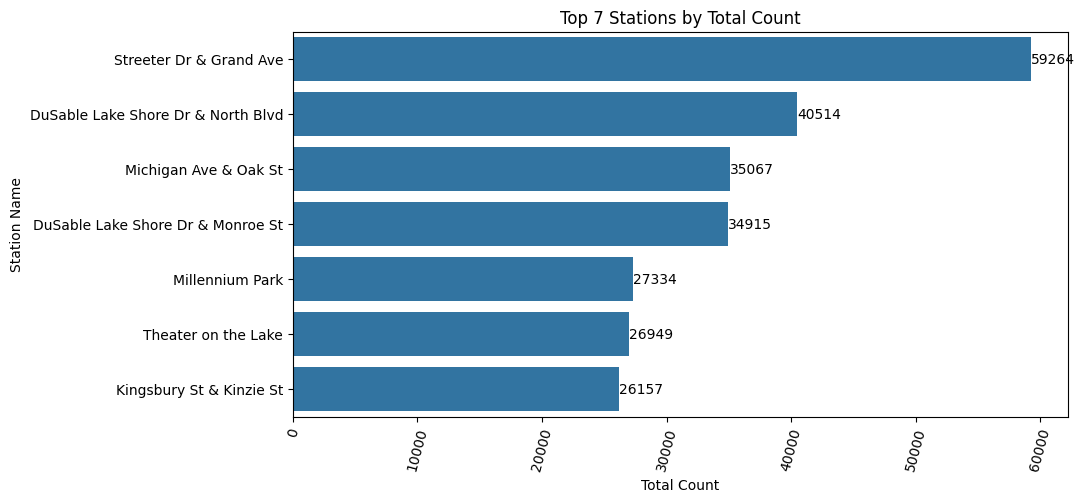

In [167]:
plot_top_stations(df, 'Top 7 Stations by Total Count')

Top 7 Stations by Total Count for Casual Riders
                      start_station_name  total_count
1294             Streeter Dr & Grand Ave      48221.0
278    DuSable Lake Shore Dr & Monroe St      27219.0
279   DuSable Lake Shore Dr & North Blvd      25206.0
631                Michigan Ave & Oak St      24194.0
638                      Millennium Park      20490.0
1211                      Shedd Aquarium      16822.0
1298                 Theater on the Lake      16396.0


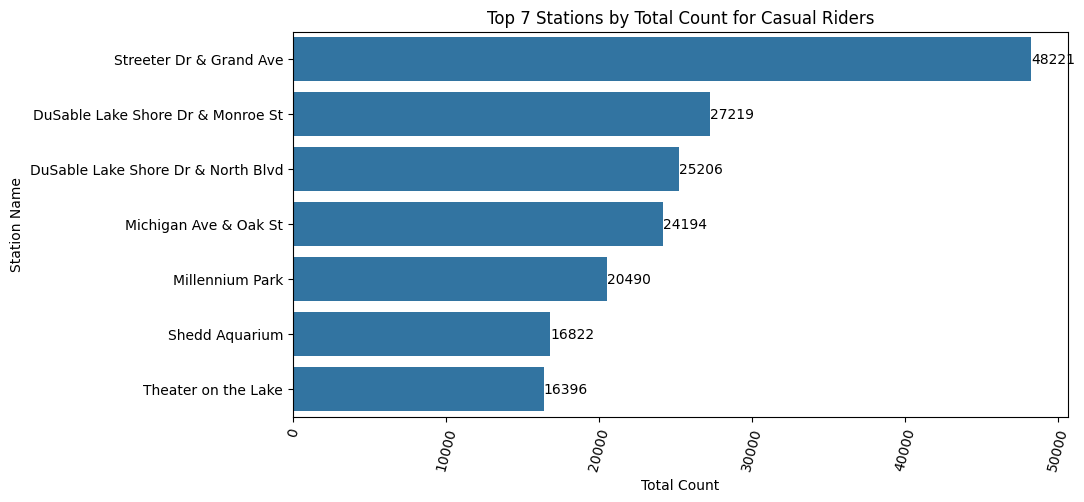

In [165]:
plot_top_stations(df_casual, 'Top 7 Stations by Total Count for Casual Riders')

Top 7 Stations by Total Count for Member Riders
                      start_station_name  total_count
470             Kingsbury St & Kinzie St      18416.0
176                    Clark St & Elm St      15628.0
202         Clinton St & Washington Blvd      15340.0
278   DuSable Lake Shore Dr & North Blvd      15308.0
198              Clinton St & Madison St      14750.0
1412               Wells St & Concord Ln      13185.0
1330              State St & Chicago Ave      12840.0


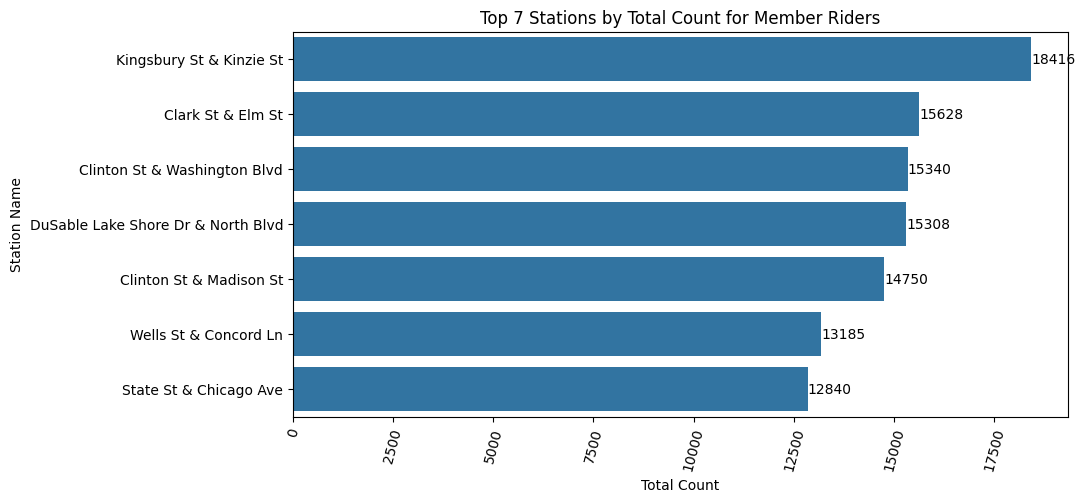

In [166]:
plot_top_stations(df_member, 'Top 7 Stations by Total Count for Member Riders')

  member_casual     rideable_type   count
0        casual      classic_bike  427494
1        casual     electric_bike  223454
2        casual  electric_scooter   25740
3        member      classic_bike  607584
4        member     electric_bike  312980
5        member  electric_scooter   22087


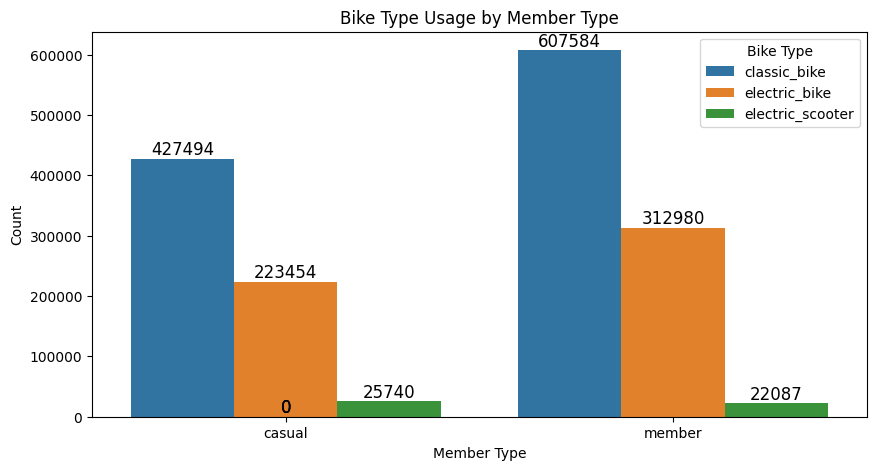

In [217]:
bike_type_counts = df.groupby(['member_casual', 'rideable_type'])['ride_id'].count().reset_index(name='count')
print(bike_type_counts)

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='member_casual', y='count', hue='rideable_type', data=bike_type_counts)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')

plt.xlabel('Member Type')
plt.ylabel('Count')
plt.title('Bike Type Usage by Member Type')
plt.legend(title='Bike Type')
plt.show()
#

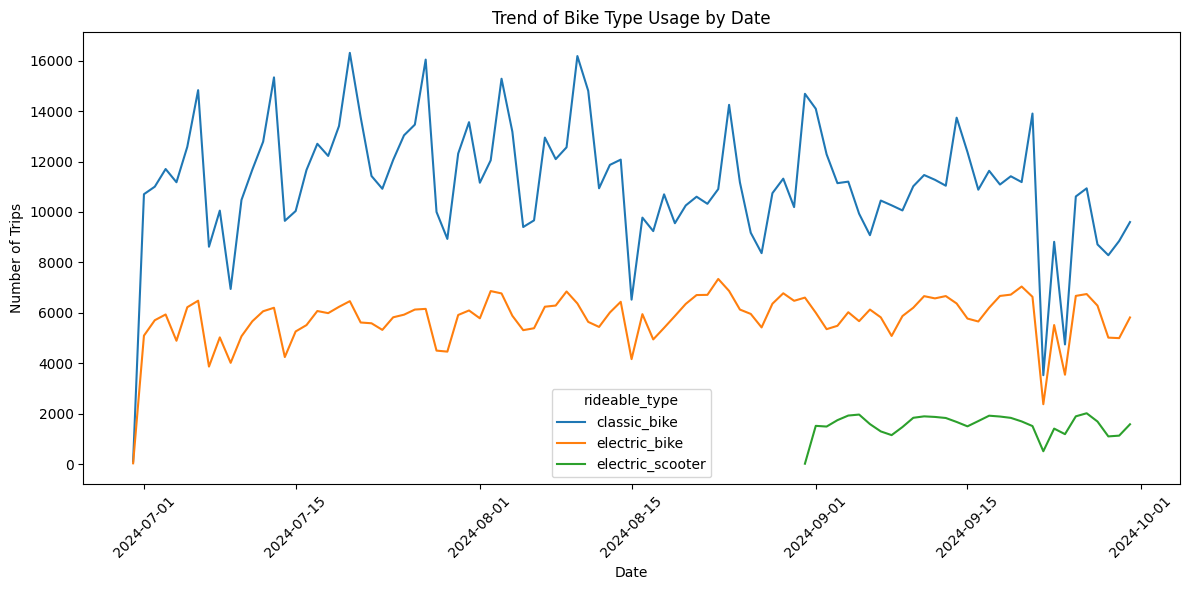

In [168]:
bike_type_by_date = df.groupby(['date', 'rideable_type'])['ride_id'].count().reset_index(name='trip_count')

#plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='trip_count', hue='rideable_type', data=bike_type_by_date)
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.title('Trend of Bike Type Usage by Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

member_casual
casual     7276.215054
member    10136.032258
Name: trip_count, dtype: float64


Text(0, 0.5, 'Average Trips per Day')

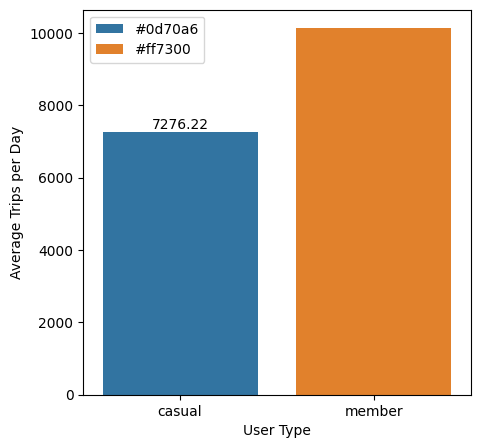

In [218]:
# Calculate average trips per day by user type
average_trips_per_day = df.groupby(['member_casual', 'date'])['ride_id'].count().reset_index(name='trip_count')
average_trips_per_day = average_trips_per_day.groupby('member_casual')['trip_count'].mean()
print(average_trips_per_day)

plt.figure(figsize=(5, 5))
ax = sns.barplot(x=average_trips_per_day.index, y=average_trips_per_day.values, hue=['#0d70a6', '#ff7300'])
ax.bar_label(ax.containers[0])
plt.xlabel('User Type')
plt.ylabel('Average Trips per Day')

  member_casual         day_type  average_trips
0        casual  weekday_average    6416.469697
1        member  weekday_average   10887.954545
2        casual  weekend_average    9377.814815
3        member  weekend_average    8298.000000


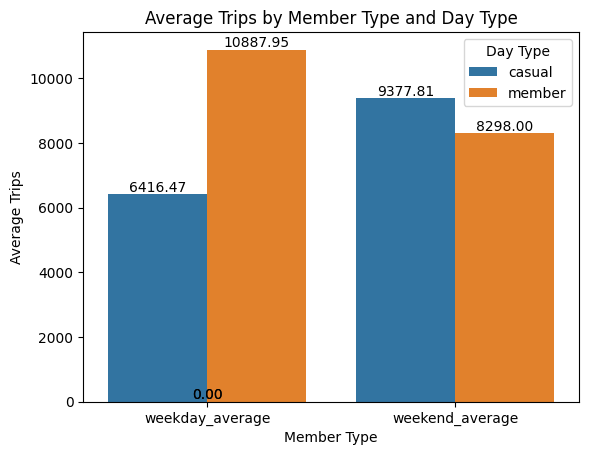

In [214]:
# Calculate average trips per weekday and weekend
average_weekday_trips = (df_weekday.groupby('member_casual')['ride_id'].count() / len(df_weekday['date'].unique())).reset_index(name='weekday_average')
average_weekend_trips = (df_weekend.groupby('member_casual')['ride_id'].count() / len(df_weekend['date'].unique())).reset_index(name='weekend_average')
average_trips = pd.merge(average_weekday_trips, average_weekend_trips, on='member_casual')

# Melt the DataFrame to long format for Seaborn
average_trips_melted = pd.melt(average_trips, id_vars=['member_casual'],
                                     value_vars=['weekday_average', 'weekend_average'],
                                     var_name='day_type', value_name='average_trips')

print(average_trips_melted)

# # Create the grouped bar plot
ax = sns.barplot(x='day_type', y='average_trips', hue='member_casual', data=average_trips_melted)

# Add value labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Customize the plot
plt.xlabel("Member Type")
plt.ylabel("Average Trips")
plt.title("Average Trips by Member Type and Day Type")
plt.legend(title="Day Type")

# Display the plot
plt.show()

  member_casual          total_ride_length
0        casual 11510 days 19:51:33.267000
1        member  8489 days 01:58:01.431000 



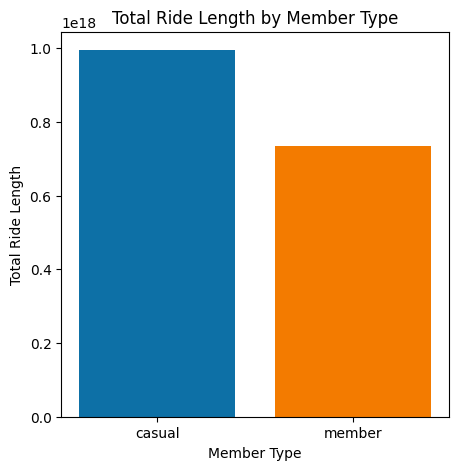

In [215]:
tot_ride_length = df.groupby("member_casual")["ride_length"].sum().reset_index(name="total_ride_length")
print(tot_ride_length, '\n')

plt.figure(figsize=(5, 5))
plt.bar(tot_ride_length["member_casual"], tot_ride_length["total_ride_length"], color=['#0d70a6', '#f37b00'])
plt.xlabel("Member Type")
plt.ylabel("Total Ride Length")
plt.title("Total Ride Length by Member Type")
plt.show()

In [191]:
# Calculate average ride length by user type
average_ride_length = df.groupby('member_casual')['ride_length'].mean()
average_ride_length

,ride_length
member_casual,
casual,0 days 00:24:29.710550899
member,0 days 00:12:58.078717819


  member_casual         day_type  average_ride_length
0        casual  weekday_average            22.719322
1        member  weekday_average            12.479909
2        casual  weekend_average            27.465350
3        member  weekend_average            14.533414


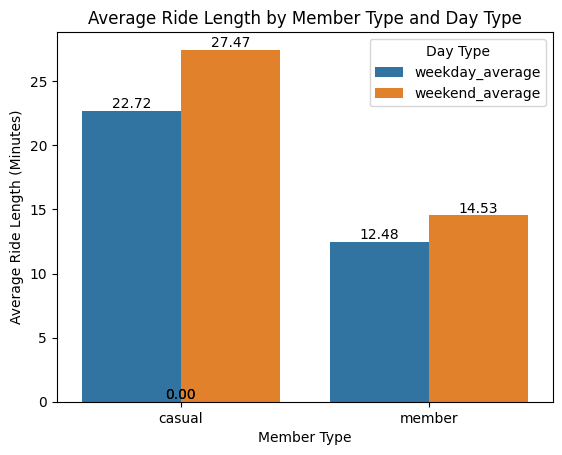

In [195]:
# Calculate average ride length on weekday and weekend by user type
average_ride_length_weekday = df_weekday.groupby('member_casual')['ride_length'].mean().reset_index(name="weekday_average")
average_ride_length_weekend = df_weekend.groupby('member_casual')['ride_length'].mean().reset_index(name="weekend_average")
average_ride_length = pd.merge(average_ride_length_weekday, average_ride_length_weekend, on='member_casual')

# Convert timedelta columns to numeric for plotting
average_ride_length['weekday_average'] = average_ride_length['weekday_average'].dt.total_seconds()/60
average_ride_length['weekend_average'] = average_ride_length['weekend_average'].dt.total_seconds()/60

# Melt the DataFrame to long format for Seaborn
average_ride_length_melted = pd.melt(average_ride_length, id_vars=['member_casual'],
                                     value_vars=['weekday_average', 'weekend_average'],
                                     var_name='day_type', value_name='average_ride_length')

print(average_ride_length_melted, '\n')

# Create the grouped bar plot
ax = sns.barplot(x='member_casual', y='average_ride_length', hue='day_type', data=average_ride_length_melted)

# Add value labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Customize the plot
plt.xlabel("Member Type")
plt.ylabel("Average Ride Length (Minutes)")
plt.title("Average Ride Length by Member Type and Day Type")
plt.legend(title="Day Type")

# Display the plot
plt.show()

1. **Trip Volume**: Members account for 942,651 trips, whereas casual users account for 676,688 trips. Members tend to take more trips on a daily average (10,136) compared to casual users (7,276).

2. **Day of the Week Patterns**:
   - Casual users are more active on weekends, with peak trips on Saturday (142,839) and Sunday (110,362).
   - Members, however, have a more balanced distribution throughout the week, with a slight peak on Wednesday (155,876).

3. **Hourly Activity**:
   - Casual users show increased activity during late morning and early afternoon hours, especially on weekends.
   - Members display a pronounced peak during commuting hours, particularly in the early morning (6-9 AM) and late afternoon (5-7 PM) on weekdays.

4. **Station Preferences**:
   - Casual users predominantly use tourist-friendly stations such as "Streeter Dr & Grand Ave" and "DuSable Lake Shore Dr & Monroe St".
   - Members frequent stations more aligned with commuting routes, such as "Kingsbury St & Kinzie St" and "Clinton St & Washington Blvd".

5. **Bike Type Usage**:
   - Both casual and member users prefer classic bikes, but a significant portion of both groups also use electric bikes.
   - Casual users have a slightly higher inclination towards electric scooters compared to members.

6. **Ride Length**:
   - Casual users have a longer average ride duration (24 minutes and 29 seconds) compared to members (12 minutes and 58 seconds).
   - This trend holds for both weekdays and weekends, with casual users having extended ride lengths on weekends.

7. **Total Ride Length**:
   - Casual users have a greater total ride length, suggesting they take longer but less frequent rides compared to members.

**Marketing Implications**:
- **Targeting Casual Users on Weekends**: Campaigns should focus on engaging casual riders during weekends, perhaps by offering weekend membership perks.
  
- **Commuter Benefits**: Highlight the advantages of membership for daily commuters, such as cost savings and convenience during peak hours.

- **Tourist Engagement**: Leverage tourist-heavy stations by promoting deals or trial memberships at those locations to convert tourists to frequent users.

- **Ride Duration Incentives**: Create incentives for casual users to reduce ride lengths, such as membership discounts for frequent short rides, which could align with the typical member usage pattern.